# Lesson 27: Numpy arrays and operations with them

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l27_numpy_arrays.ipynb).*

<br /> <br />

In [1]:
import numpy as np
import pandas as pd
import altair as alt

import bootcamp_utils

We just got an introduction to NumPy and SciPy. The packages are extensive. At the center is the NumPy array data type.  We will explore this data type in this tutorial. It is worth noting that under the hood of many of the operations we do with Pandas `DataFrame`s are done with NumPy arrays. As you understand how NumPy arrays work, you will also better understand what Pandas is doing.

As it is always more fun to work with a real biological application, we will populate our NumPy arrays with data. In their 2011 [paper in PLoS ONE](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0025840), Harvey and Orbidans measured the cross-sectional area of *C. elegans* eggs that came from mothers who had a high concentration of food and from mothers of a low concentration of food.  I digitized the data from their plots, and they are available in the file `data/c_elegans_egg_xa.csv` in the bootcamp repository.

## Extracting Numpy arrays from Pandas data frames

NumPy has a primitive function for loading in data from text files, `np.loadtxt()`, but with Panda's `read_csv()`, there is really no reason to ever use it. So, we will load in the (tidy) data using Pandas.

In [2]:
df = pd.read_csv('data/c_elegans_egg_xa.csv', comment='#')

# Take a look
df.head()

,food,area (sq. um)
0,high,1683
1,high,2061
2,high,1792
3,high,1852
4,high,2091


It's a good idea, since we're using Altair, to change the column name for the area to exclude the dot.

In [3]:
df = df.rename(columns={'area (sq. um)': 'area (sq um)'})

Just for fun, let's make a quick plot. We can do this because we went high level first.

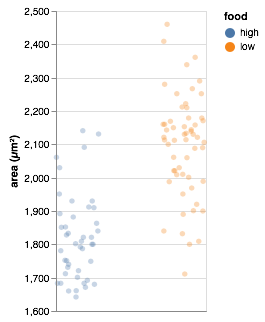

In [4]:
bootcamp_utils.altair_jitter(df,
                             encode_x=alt.X('food:N'), 
                             encode_y=alt.Y('area (sq um):Q',
                                            title='area (µm²)', 
                                            scale=alt.Scale(zero=False)),
                             height=300,
                             width=150).configure_point(filled=True,
                                                        opacity=0.3)

It looks like worms that eat more food have smaller eggs.

If we wanted to extract the measurements for worms with high food, we can do so using Boolean indexing in Pandas.

In [5]:
xa_high = df.loc[df['food']=='high', 'area (sq um)']

# Take a look at the data type
type(xa_high)

pandas.core.series.Series

The result is a Pandas `Series`, which is kind of like a single-column `DataFrame`. If we want to convert this to a Numpy array, we use the `.values` attribute.

In [6]:
xa_high = df.loc[df['food']=='high', 'area (sq um)'].values

type(xa_high)

numpy.ndarray

Now we have a Numpy array! Let's pull out the low food cross sectional areas as well.

In [7]:
xa_low = df.loc[df['food']=='low', 'area (sq um)'].values

And now let's take a look at these arrays.

In [8]:
xa_high

array([1683, 2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892,
       1951, 1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683,
       1671, 1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701,
       2141, 1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828])

In [9]:
xa_low

array([1840, 2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290, 1920, 2280,
       1809, 2158, 1800, 2133, 2060, 2160, 2001, 2030, 2088, 1951, 2460,
       2021, 2010, 2139, 2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021,
       1969, 2150, 1900, 2267, 1711, 1901, 2114, 2112, 2361, 2130, 2061,
       2121, 1832, 2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222,
       2121, 2409])

We will use these arrays as examples to learn about Numpy arrays.

## Operators and NumPy arrays

We saw in the previous tutorial that NumPy arrays are a special data type.  They have well-defined ways in which our familiar operators work with them.  Let's learn about this by example.

### Scalars and NumPy arrays

We'll start with multiplying by an array by a constant.  Say we wanted to convert the units of the cross sectional area from µm$^2$ to mm$^2$.  This means we have to divide every entry by 10$^6$ (or multiply by 10$^{-6}$).  Multiplication by a scalar works elementwise on NumPy arrays.  Check it out.

In [10]:
xa_high / 1e6

array([0.001683, 0.002061, 0.001792, 0.001852, 0.002091, 0.001781,
       0.001912, 0.001802, 0.001751, 0.001731, 0.001892, 0.001951,
       0.001809, 0.001683, 0.001787, 0.00184 , 0.001821, 0.00191 ,
       0.00193 , 0.0018  , 0.001833, 0.001683, 0.001671, 0.00168 ,
       0.001692, 0.0018  , 0.001821, 0.001882, 0.001642, 0.001749,
       0.001712, 0.001661, 0.001701, 0.002141, 0.001863, 0.001752,
       0.00174 , 0.001721, 0.00166 , 0.00193 , 0.00203 , 0.001851,
       0.002131, 0.001828])

Notice that `1e6` is how we represent numbers in Python in scientific notation, and that dividing the NumPy array by this number resulted in every entry in the array being divided.  The `+`, `-`, and `*` operators all work in this way.  For example:

In [11]:
xa_high + 1000

array([2683, 3061, 2792, 2852, 3091, 2781, 2912, 2802, 2751, 2731, 2892,
       2951, 2809, 2683, 2787, 2840, 2821, 2910, 2930, 2800, 2833, 2683,
       2671, 2680, 2692, 2800, 2821, 2882, 2642, 2749, 2712, 2661, 2701,
       3141, 2863, 2752, 2740, 2721, 2660, 2930, 3030, 2851, 3131, 2828])

### Booleans with NumPy arrays and scalars

Let's see what happens when we compare a NumPy array to a scalar.

In [12]:
xa_high < 2000

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True])

We get an array of Booleans!  The comparison is elementwise.  This is important to know because we cannot use these comparisons with an **`if`** clause.

In [13]:
if xa_high > 2000:
    print('Nothing to print, really.  This will just be an error.')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Let's take the advice from the exception and use the `.any()` or `.all()` operators.

In [14]:
# Check if any values are biggern than 2000
(xa_high > 2000).any()

True

Remember, the expresson `(xa_high > 2000)` is itself a NumPy array of Booleans.  The `any()` method returns `True` if *any* of the entries in that array are `True`.  Similarly, the `all()` method returns `True` if *all* entries in the array are `True`.

In [15]:
(xa_high > 2000).all()

False

Yup!  At least one cross sectional area is greater than 2000 µm$^2$ but not all of them.

### Equality checks with NumPy arrays

Remember, you should never use the equality operator (`==`) with `float`s. Fortunately, NumPy offers a couple nice functions to check if two numbers are *almost* equal. This helps deal with the numerical precision issues when comparing `float`s. The `np.isclose()` function checks to see if two numbers are close in value, and this is really useful in writing tests. It works elementwise for NumPy arrays.

In [16]:
# Compare two numbers
np.isclose(1.3, 1.29999999999)

True

In [17]:
# Compare an array to a scalar
np.isclose(xa_high, 1800)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

A couple cross sectional areas are 1800 µm$^2$.  The `np.allclose()` function checks to see if all values in a NumPy array are close.

In [18]:
np.allclose(xa_high, 1800)

False

### Operators with two NumPy arrays

We can apply operators with two NumPy ararys.  Let's give it a whirl. (This is meaningless in the context of the actual data contained in these arrays, but it's an operation we need to understand.)

In [19]:
xa_high + xa_low

ValueError: operands could not be broadcast together with shapes (44,) (57,) 

Yikes! The exception tells us that the two arrays we are using the operator on need to have the same shape. This makes sense: if we are going to do element-by-element addition, the arrays better have the same number of elements. To continue with our operators on two arrays, we'll slice the longer NumPy array. The basic slicing syntax is the same as for strings, lists, and tuples.

In [20]:
# Just take the first elements
xa_low_slice = xa_low[:len(xa_high)]

Ok, let's try adding arrays again.

In [21]:
xa_high + xa_low_slice

array([3523, 4151, 3961, 3840, 4303, 4120, 3901, 3946, 4041, 3651, 4172,
       3760, 3967, 3483, 3920, 3900, 3981, 3911, 3960, 3888, 3784, 4143,
       3692, 3690, 3831, 3960, 3927, 4053, 3755, 3928, 3602, 3840, 3722,
       4110, 4013, 3652, 4007, 3432, 3561, 4044, 4142, 4212, 4261, 3889])

Great!  We get element-by-element addition.  The same happens for the other operators we've discussed.  `np.isclose()` also operates element-by-element.

In [22]:
np.isclose(xa_high, xa_low_slice)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

## Slicing NumPy arrays

We already saw that we can slice NumPy arrays like lists and tuples.  Here are a few examples.

In [23]:
# Reversed array
xa_high[::-1]

array([1828, 2131, 1851, 2030, 1930, 1660, 1721, 1740, 1752, 1863, 2141,
       1701, 1661, 1712, 1749, 1642, 1882, 1821, 1800, 1692, 1680, 1671,
       1683, 1833, 1800, 1930, 1910, 1821, 1840, 1787, 1683, 1809, 1951,
       1892, 1731, 1751, 1802, 1912, 1781, 2091, 1852, 1792, 2061, 1683])

In [24]:
# Every 5th element, starting at index 3
xa_high[3::5]

array([1852, 1751, 1683, 1930, 1680, 1642, 2141, 1660, 1828])

In [25]:
# Entries 10 to 20
xa_high[10:21]

array([1892, 1951, 1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833])

### Fancy indexing

NumPy arrays also allow **fancy indexing**, where we can slice out specific values.  For example, say we wanted indices 1, 19, and 6 (in that order) from `xa_high`.  We just index with a list of the indices we want.

In [26]:
xa_high[[1, 19, 6]]

array([2061, 1800, 1912])

Instead of a list, we could also use a NumPy array.

In [27]:
xa_high[np.array([1, 19, 6])]

array([2061, 1800, 1912])

As a very nice feature, we can use Boolean indexing with Numpy arrays, just like with Pandas using `.loc`. Say we only want the egg cross sectional areas that are greater than 2000 µm$^2$.

In [28]:
# Just slice out the big ones
xa_high[xa_high > 2000]

array([2061, 2091, 2141, 2030, 2131])

If we want to know the indices where the values are high, we can use the `np.where()` function.

In [29]:
np.where(xa_high > 2000)

(array([ 1,  4, 33, 40, 42]),)

## NumPy arrays are mutable

Yes, NumPy arrays are mutable.  Let's look at some consequences.

In [30]:
# Make an array
my_ar = np.array([1, 2, 3, 4])

# Change an element
my_ar[2] = 6

# See the result
my_ar

array([1, 2, 6, 4])

Now, let's try working attaching another variable to the NumPy array.

In [31]:
# Attach a new variable
my_ar2 = my_ar

# Set an entry using the new variable
my_ar2[3] = 9

# Does the original change? (yes.)
my_ar

array([1, 2, 6, 9])

Let's see how messing with NumPy in functions affects things.

In [32]:
# Re-instantiate my_ar
my_ar = np.array([1, 2, 3, 4]).astype(float)

# Function to normalize x (note that /= works with mutable objects)
def normalize(x):
    x /= np.sum(x)

# Pass it through a function
normalize(my_ar)

# Is it normalized even though we didn't return anything? (Yes.)
my_ar

array([0.1, 0.2, 0.3, 0.4])

So, be careful when writing functions.  What you do to your NumPy array inside the function will happen outside of the function as well.

### Slices of NumPy arrays are **views**, not copies

A very important distinction between NumPy arrays and lists is that slices of NumPy arrays are **views** into the original NumPy array, NOT copies.

In [33]:
# Make list and array
my_list = [1, 2, 3, 4]
my_ar = np.array(my_list)

# Slice out of each
my_list_slice = my_list[1:-1]
my_ar_slice = my_ar[1:-1]

# Mess with the slices
my_list_slice[0] = 9
my_ar_slice[0] = 9

# Look at originals
print(my_list)
print(my_ar)

[1, 2, 3, 4]
[1 9 3 4]


Messing with an element of a slice of a NumPy array messes with that element in the original!  This is not the case with lists.  Let's issue a warning.

<div class="alert alert-danger">
<center>Slices of NumPy arrays are **views**, not copies.</center>
</div>

Fortunately, you can make a copy of an array using the `np.copy()` function.

In [34]:
# Make a copy
xa_high_copy = np.copy(xa_high)

# Mess with an entry
xa_high_copy[10] = 2000

# Check equality
np.allclose(xa_high, xa_high_copy)

False

So, messing with an entry in the copy did not affect the original.

## Indexing 2D NumPy arrays

NumPy arrays need not be one-dimensional.  We'll create a two-dimensional NumPy array by reshaping our `xa_high` array from having shape `(44,)` to having shape `(11, 4)`.  That is, it will become an array with 11 rows and 4 columns.

In [35]:
# New 2D array using the reshape() method
my_ar = xa_high.reshape((11, 4))

# Look at it
my_ar

array([[1683, 2061, 1792, 1852],
       [2091, 1781, 1912, 1802],
       [1751, 1731, 1892, 1951],
       [1809, 1683, 1787, 1840],
       [1821, 1910, 1930, 1800],
       [1833, 1683, 1671, 1680],
       [1692, 1800, 1821, 1882],
       [1642, 1749, 1712, 1661],
       [1701, 2141, 1863, 1752],
       [1740, 1721, 1660, 1930],
       [2030, 1851, 2131, 1828]])

Notice that it is represented as an array made out of a list of lists.  If we had a list of lists, we would index it like this:

    list_of_lists[i][j]

In [36]:
# Make list of lists
list_of_lists = [[1, 2], [3, 4]]

# Pull out value in first row, second column
list_of_lists[0][1]

2

Though this will work with NumPy arrays, this is *not* how NumPy arrays are indexed.  They are indexed much more conveniently.

In [37]:
my_ar[0,1]

2061

We essentially have a tuple in the indexing brackets.  Now, say we wanted the second row (indexing starting at 0).

In [38]:
my_ar[2,:]

array([1751, 1731, 1892, 1951])

We can use Boolean indexing as before.

In [39]:
my_ar[my_ar > 2000]

array([2061, 2091, 2141, 2030, 2131])

Note that this gives a one-dimensional list of the entries greater than 2000. If we wanted indices where this is the case, we can again use `np.where()`.

In [40]:
np.where(my_ar > 2000)

(array([ 0,  1,  8, 10, 10]), array([1, 0, 1, 0, 2]))

This tuple of NumPy arrays is how we would index using fancy indexing to pull those values out using fancy indexing.

In [41]:
my_ar[(np.array([ 0,  1,  8, 10, 10]), np.array([1, 0, 1, 0, 2]))]

array([2061, 2091, 2141, 2030, 2131])

NumPy arrays can be of arbitrary integer dimension, and these principles extrapolate to 3D, 4D, etc., arrays.

## Concatenating arrays

Let's say we want to study all cross sectional areas and don't care if the mother was well-fed or not.  We would want to concatenate our arrays.  The `np.concatenate()` function accomplishes this.  We simply have to pass it a tuple containing the NumPy arrays we want to concatenate.

In [42]:
combined = np.concatenate((xa_high, xa_low))

# Look at it
combined

array([1683, 2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892,
       1951, 1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683,
       1671, 1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701,
       2141, 1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828,
       1840, 2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290, 1920, 2280,
       1809, 2158, 1800, 2133, 2060, 2160, 2001, 2030, 2088, 1951, 2460,
       2021, 2010, 2139, 2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021,
       1969, 2150, 1900, 2267, 1711, 1901, 2114, 2112, 2361, 2130, 2061,
       2121, 1832, 2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222,
       2121, 2409])